## Gradient Descent

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import HTML
from matplotlib import rc, animation
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Utilizamos el dataset de iris lo importamos y lo transformamos en pandas dataframe para manipular los datos

In [2]:
data = load_iris()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

A continuación realizamos una descripción general de los datos, así como su matriz de correlación con las 4 variables

In [3]:
df.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000

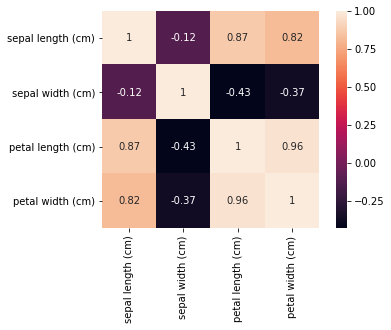

In [4]:
## Matriz de correlacion de las 4 variables
corrmat = df.corr()
sns.heatmap(corrmat, annot = True, square = True)
plt.show()

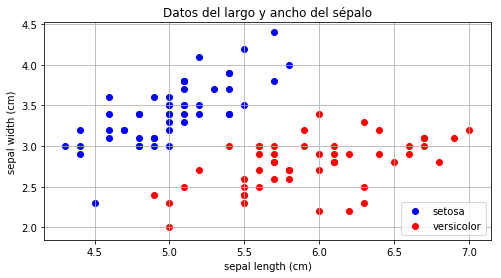

In [5]:
X = data.data
Y = data.target

f1 = 0
f2 = 1

X = X[Y<2,f1:f2+1]
Y = Y[Y<2]

fig, ax = plt.subplots(figsize=(8,4))
line, = ax.plot([],[], 'k-')

plt.title("Datos del largo y ancho del sépalo")
ax.scatter(X[Y==0, 0], X[Y==0,1], c='b', label=data.target_names[0])
ax.scatter(X[Y==1, 0], X[Y==1,1], c='r', label=data.target_names[1])
ax.legend(loc='lower right')

ax.set_xlabel(data.feature_names[f1])
ax.set_ylabel(data.feature_names[f2])

x = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 200)
ax.grid(True)

In [6]:
def anima(i):
    y = thetas[i][0] + thetas[i][1] * x
    line.set_data(x,y)
    return line,

In [7]:
df['target'] = data['target']
df["target"] = np.where((df.target==0), 1, -1)
train, test = train_test_split(df, test_size = 0.2, stratify = data['target'], random_state = 42)

In [8]:
def gradient_descent(data, n_iters, lambda_, eta):

    labels = data.iloc[0:,4].values 
    X = data.iloc[0:, 0:2].values 
    theta = np.zeros(1 + X.shape[1])    
    epsilon= 0.0001
    n = len(data) 
    i = 0
    j_theta = 0
    j_theta_ant = 1
    thetas = []
        
    while abs(j_theta - j_theta_ant ) > epsilon and i < n_iters:
        res_theta = np.zeros(1 + X.shape[1])
        sum_res = 0
        j_theta_ant = j_theta
        for xi, label in zip(X,labels):                        
            target = label * (theta[1:] @ xi + theta[0])
            if  target < 1:
                res_theta[1:] += -1 * label  * xi + (lambda_ * theta[1:])
                res_theta[0] += -1 * label
                sum_res += 1 - target
            else:
                res_theta[1:] += lambda_ * theta[1:]
                res_theta[0] += 0
                sum_res += 0
        theta[1:] = theta[1:] - eta * (1/n) * res_theta[1:]
        theta[0] = theta[0] - eta * (1/n) * res_theta[0]
        thetas.append((-theta[0]/theta[2],-theta[1]/theta[2]))
        j_theta = (1/n) * sum_res + (lambda_ / 2) * np.linalg.norm(theta[1:],2)
        i += 1
    print (f"Número de pasos: {i}")
    print (f"Mínimo local: {theta[1:]}")
    return theta, thetas

Ya que implementamos la función de descenso por gradiente que, busca a través de las iteraciones llegar a definir si un registro es o no clasificado como setosa. Lo probamos con mil iteraciones y un valor de lambda de 0.1 en el conjunto de datos que definimos como test y vemos que logra una precisión del 96.66%

In [9]:
theta, thetas = gradient_descent(train,1000,0.1, 0.1)
t_ = test.iloc[0:, 0:2].values
## Probamos el modelo con, el resultado del producto punto entre theta y el vector de características del dataset de prueba
y_pred = pd.Series([(theta[1:] @ t_[i] > 0) for i in range (t_.shape[0])]).map({False:-1, True:1 }).values
y_test = test.iloc[0:,4].values
print(f"Precisión del modelo con el dataset de prueba: {accuracy_score(y_test,y_pred)}")

Número de pasos: 194
Mínimo local: [-0.97567042  1.49582416]
Precisión del modelo con el dataset de prueba: 0.9666666666666667


La forma en que el modelo se fue ajustando se puede ver muy didácticamnte con la siguiente gráfica.

In [10]:
animacion = animation.FuncAnimation(fig, anima, frames=len(thetas), interval=200, blit=True)
HTML(animacion.to_jshtml())